In [19]:
import pandas as pd

In [20]:
df1 = pd.read_csv("건강보험심사평가원_시군구별 성별 연령군별 치매질환 진료 통계 2023.csv",encoding = 'EUC-KR')
df1

,진료년도,시도,시군구,성별,연령군,환자수,입내원일수,요양급여비용총액
0,2023,서울,강남구,남,0~9세,0,0,0
1,2023,서울,강남구,남,10~19세,0,0,0
2,2023,서울,강남구,남,20~29세,0,0,0
3,2023,서울,강남구,남,30~39세,0,0,0
4,2023,서울,강남구,남,40~49세,0,0,0
...,...,...,...,...,...,...,...,...
5583,2023,세종,세종시,여,60~69세,108,1620,115079840
5584,2023,세종,세종시,여,70~79세,395,5628,390048730
5585,2023,세종,세종시,여,80~89세,1117,27709,1993346900
5586,2023,세종,세종시,여,90~99세,316,14473,1099869810


In [21]:
df2 = pd.read_csv('경찰청_연도별 실종아동등 가출인 접수 및 해제현황_20231231.csv',encoding='EUC-KR')
df2.tail()

,연도,18세_미만_아동_접수,18세_미만_아동_해제,18세_미만_아동_미해제,지적자폐성정신장애인_접수,지적자폐성정신장애인_해제,지적자폐성정신장애인_미해제,치매환자_접수,치매환자_해제,치매환자_미해제,가출인(실종성인)_접수,가출인(실종성인)_해제,가출인(실종성인)_미해제
0,2021,21379,21257,3,7166,7168,4,12577,12562,9,66259,66536,334
1,2022,26416,26357,12,8344,8337,6,14527,14525,10,74936,75755,360
2,2023,25628,25516,72,8440,8434,42,14677,14654,23,74847,74827,842


In [22]:
age_idx = ['0~9세', '10~19세', '20~29세', '30~39세', '40~49세','50~59세','60~69세','70~79세',\
           '80~89세','90~99세']
age_df1= []
for i in range(10):
    age_df1.append(df1[df1['연령군']== age_idx[i]])

age_df1[7]
# 나이대별로 분리

,진료년도,시도,시군구,성별,연령군,환자수,입내원일수,요양급여비용총액
7,2023,서울,강남구,남,70~79세,507,2857,308115300
18,2023,서울,강남구,여,70~79세,928,3851,389854610
29,2023,서울,강동구,남,70~79세,1385,11247,1140804820
40,2023,서울,강동구,여,70~79세,1047,9200,864415390
51,2023,서울,강서구,남,70~79세,322,2663,231734520
...,...,...,...,...,...,...,...,...
5540,2023,제주,서귀포시,여,70~79세,326,2033,106516240
5551,2023,제주,제주시,남,70~79세,589,8623,725658720
5562,2023,제주,제주시,여,70~79세,931,8918,728178760
5573,2023,세종,세종시,남,70~79세,227,3389,241562830


In [23]:
age_total_group = df1.groupby('연령군')['환자수'].sum().reset_index()
age_total_group['환자수'] = age_total_group['환자수'].apply(lambda x: f"{x:,.0f}")
age_total_group
# 연력군별 전체 환자수

,연령군,환자수
0,0~9세,0
1,100세 이상,"2,719"
2,10~19세,0
3,20~29세,0
4,30~39세,0
5,40~49세,91
6,50~59세,"4,524"
7,60~69세,"41,116"
8,70~79세,"180,483"
9,80~89세,"428,388"


In [24]:
df2_columns_select = ['연도','치매환자_접수','치매환자_해제','치매환자_미해제']
new_df2 = df2[df2_columns_select].iloc[2]
new_df2

연도           2023
치매환자_접수     14677
치매환자_해제     14654
치매환자_미해제       23
Name: 2, dtype: int64

In [66]:
sex_total_group = df1.groupby('성별')['환자수'].sum().reset_index()
sex_total_group

,성별,환자수
0,남,225089
1,여,554106


In [26]:
province_total_group = df1.groupby('시도')['환자수'].sum().reset_index()
province_total_group['환자수'] = province_total_group['환자수'].apply(lambda x: f"{x:,.0f}")
province_total_group


,시도,환자수
0,강원,"22,397"
1,경기,"167,431"
2,경남,"60,175"
3,경북,"58,359"
4,광주,"25,553"
5,대구,"45,280"
6,대전,"22,510"
7,부산,"53,345"
8,서울,"89,335"
9,세종,"2,721"


In [27]:
province_total_price = df1.groupby('시도')['요양급여비용총액'].sum().reset_index()
province_total_price['요양급여비용총액'] = province_total_price['요양급여비용총액'].apply(lambda x: f"{x:,.0f}")
province_total_price


,시도,요양급여비용총액
0,강원,"24,500,300,680"
1,경기,"285,640,629,520"
2,경남,"230,333,693,510"
3,경북,"180,593,896,420"
4,광주,"133,822,206,790"
5,대구,"113,654,662,870"
6,대전,"57,575,462,480"
7,부산,"299,447,349,820"
8,서울,"107,557,169,650"
9,세종,"4,315,323,530"


In [28]:
province_days_mean = df1.groupby('시도')['입내원일수'].mean()
province_days_mean

시도
강원      816.439394
경기     3515.705051
경남     5818.123967
경북     4222.187500
광주    14162.690909
대구     6994.454545
대전     6430.836364
부산    10151.494318
서울     2127.945455
세종     2730.000000
울산     7327.400000
인천     3731.895455
전남     4358.886364
전북     5981.075758
제주     3260.977273
충남     3625.232955
충북     1736.821429
Name: 입내원일수, dtype: float64

In [29]:
age_days_mean = df1.groupby('연령군')['입내원일수'].mean()
age_days_mean = age_days_mean.astype(int).apply(lambda x: f"{x:,.0f}")
age_days_mean


연령군
0~9세            0
100세 이상       322
10~19세          0
20~29세          0
30~39세          0
40~49세          0
50~59세        188
60~69세      1,864
70~79세      7,615
80~89세     27,262
90~99세     11,895
Name: 입내원일수, dtype: object

In [30]:
age_price_mean = df1.groupby('연령군')['요양급여비용총액'].mean().astype(int).apply(lambda x: f"{x:,.0f}")
age_price_mean

연령군
0~9세                   0
100세 이상       25,688,033
10~19세                 0
20~29세                 0
30~39세                 0
40~49세            81,733
50~59세        17,355,279
60~69세       164,338,473
70~79세       651,209,750
80~89세     2,239,704,700
90~99세       960,426,901
Name: 요양급여비용총액, dtype: object

In [55]:

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
shapefile_path = "skorea-provinces-2011.shp"
map_data = gpd.read_file(shapefile_path, encoding='euc-kr')
map_data

,code,name,name_eng,base_year,geometry
0,39,제주특별자치도,Jeju,2011,"MULTIPOLYGON (((131786.371 -42348.449, 131746...."
1,38,경상남도,Gyeongsangnam-do,2011,"MULTIPOLYGON (((312243.984 122605.755, 312237...."
2,37,경상북도,Gyeongsangbuk-do,2011,"MULTIPOLYGON (((424181.541 246951.289, 424169...."
3,36,전라남도,Jeollanam-do,2011,"MULTIPOLYGON (((234510.596 56601.881, 234468.5..."
4,35,전라북도,Jeollabuk-do,2011,"MULTIPOLYGON (((148022.908 216637.962, 148017...."
5,34,충청남도,Chungcheongnam-do,2011,"MULTIPOLYGON (((164170.108 276811.165, 164148...."
6,33,충청북도,Chungcheongbuk-do,2011,"POLYGON ((286869.626 417782.462, 286921.31 417..."
7,32,강원도,Gangwon-do,2011,"MULTIPOLYGON (((353118.159 501845.806, 353099...."
8,31,경기도,Gyeonggi-do,2011,"MULTIPOLYGON (((153403.93 397833.766, 153361.9..."
9,26,울산광역시,Ulsan,2011,"MULTIPOLYGON (((421462.995 224875.105, 421476...."


In [56]:
map_data.loc[map_data['name'] == '제주특별자치도', 'name'] = '제주'
map_data.loc[map_data['name'] == '경상남도', 'name'] = '경남'
map_data.loc[map_data['name'] == '경상북도', 'name'] = '경북'
map_data.loc[map_data['name'] == '전라남도', 'name'] = '전남'
map_data.loc[map_data['name'] == '전라북도', 'name'] = '전북'
map_data.loc[map_data['name'] == '충청남도', 'name'] = '충남'
map_data.loc[map_data['name'] == '충청북도', 'name'] = '충북'
map_data.loc[map_data['name'] == '강원도', 'name'] = '강원'
map_data.loc[map_data['name'] == '경기도', 'name'] = '경기'
map_data.loc[map_data['name'] == '울산광역시', 'name'] = '울산'
map_data.loc[map_data['name'] == '대전광역시', 'name'] = '대전'
map_data.loc[map_data['name'] == '광주광역시', 'name'] = '광주'
map_data.loc[map_data['name'] == '인천광역시', 'name'] = '인천'
map_data.loc[map_data['name'] == '대구광역시', 'name'] = '대구'
map_data.loc[map_data['name'] == '부산광역시', 'name'] = '부산'
map_data.loc[map_data['name'] == '서울특별시', 'name'] = '서울'
map_data

,code,name,name_eng,base_year,geometry
0,39,제주,Jeju,2011,"MULTIPOLYGON (((131786.371 -42348.449, 131746...."
1,38,경남,Gyeongsangnam-do,2011,"MULTIPOLYGON (((312243.984 122605.755, 312237...."
2,37,경북,Gyeongsangbuk-do,2011,"MULTIPOLYGON (((424181.541 246951.289, 424169...."
3,36,전남,Jeollanam-do,2011,"MULTIPOLYGON (((234510.596 56601.881, 234468.5..."
4,35,전북,Jeollabuk-do,2011,"MULTIPOLYGON (((148022.908 216637.962, 148017...."
5,34,충남,Chungcheongnam-do,2011,"MULTIPOLYGON (((164170.108 276811.165, 164148...."
6,33,충북,Chungcheongbuk-do,2011,"POLYGON ((286869.626 417782.462, 286921.31 417..."
7,32,강원,Gangwon-do,2011,"MULTIPOLYGON (((353118.159 501845.806, 353099...."
8,31,경기,Gyeonggi-do,2011,"MULTIPOLYGON (((153403.93 397833.766, 153361.9..."
9,26,울산,Ulsan,2011,"MULTIPOLYGON (((421462.995 224875.105, 421476...."


In [61]:
map_data = map_data.rename(columns={'name': '시도'})
merged_data = map_data.merge(province_total_group, on='시도')
merged_data['환자수'] = merged_data['환자수'].replace(',', '', regex=True)
merged_data['환자수'] = merged_data['환자수'].astype(int)
merged_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   code       16 non-null     object  
 1   시도         16 non-null     object  
 2   name_eng   16 non-null     object  
 3   base_year  16 non-null     object  
 4   geometry   16 non-null     geometry
 5   환자수        16 non-null     int64   
dtypes: geometry(1), int64(1), object(4)
memory usage: 900.0+ bytes


<Figure size 1200x1200 with 0 Axes>

/Users/dongyoungkim/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/dongyoungkim/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44400 (\N{HANGUL SYLLABLE GUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/dongyoungkim/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/dongyoungkim/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/dongyoungkim/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWar

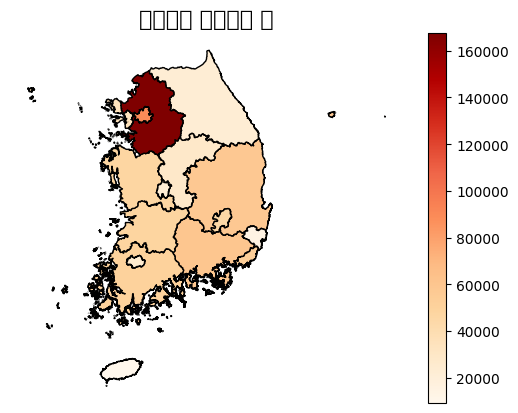

In [63]:
plt.figure(figsize=(12, 12))
ax = merged_data.plot(
    column='환자수',
    cmap='OrRd',
    legend=True,
    edgecolor='black',
    missing_kwds={
        "color": "lightgrey",
        "label": "No data"
    }
)
ax.set_title("시군구별 치매환자 수", fontsize=16)
ax.set_axis_off()

plt.show()


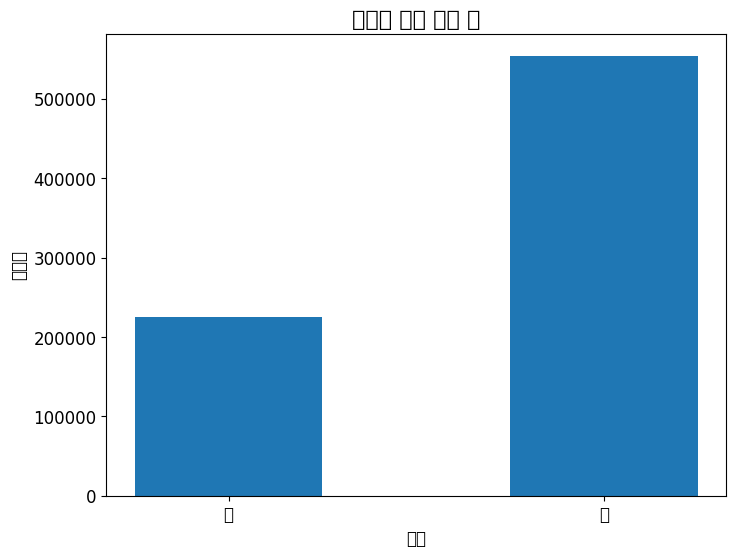

In [68]:
# 데이터 시각화
plt.figure(figsize=(8, 6))
plt.bar(sex_total_group['성별'], sex_total_group['환자수'], width=0.5)
plt.title('성별에 따른 환자 수', fontsize=16)
plt.xlabel('성별', fontsize=12)
plt.ylabel('환자수', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
